In [1]:
!pip install pandas numpy faiss-cpu sentence-transformers fastapi uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5

In [2]:
!pip install fastapi uvicorn nest_asyncio pyngrok


In [3]:
!pip install flask faiss-cpu numpy pandas sentence-transformers flask_ngrok



In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ BUYOGO NTERNSHIP PRJ/hotel_bookings.csv')


print("Dataset Info:\n")
df.info()


print("\nFirst 5 Rows:\n", df.head())


print("\nMissing Values Count:\n", df.isnull().sum())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  m

In [ ]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ BUYOGO NTERNSHIP PRJ/hotel_bookings.csv')


df['children'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['agent'].fillna(0, inplace=True)


df.drop(columns=['company'], inplace=True)


df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%y')


month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)

print("Dataset Info after Cleaning:\n")
df.info()


print("\nFirst 5 Rows:\n", df.head())


print("\nMissing Values Count after Cleaning:\n", df.isnull().sum())


<ipython-input-3-76dc31882707>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
<ipython-input-3-76dc31882707>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

Dataset Info after Cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                  

In [ ]:
import pandas as pd


cleaned_csv_path = "/content/drive/MyDrive/Colab Notebooks/ BUYOGO NTERNSHIP PRJ/cleaned_hotel_bookings.csv"
df.to_csv(cleaned_csv_path, index=False)

print(f"Cleaned data saved to {cleaned_csv_path}")


Cleaned data saved to /content/drive/MyDrive/Colab Notebooks/ BUYOGO NTERNSHIP PRJ/cleaned_hotel_bookings.csv


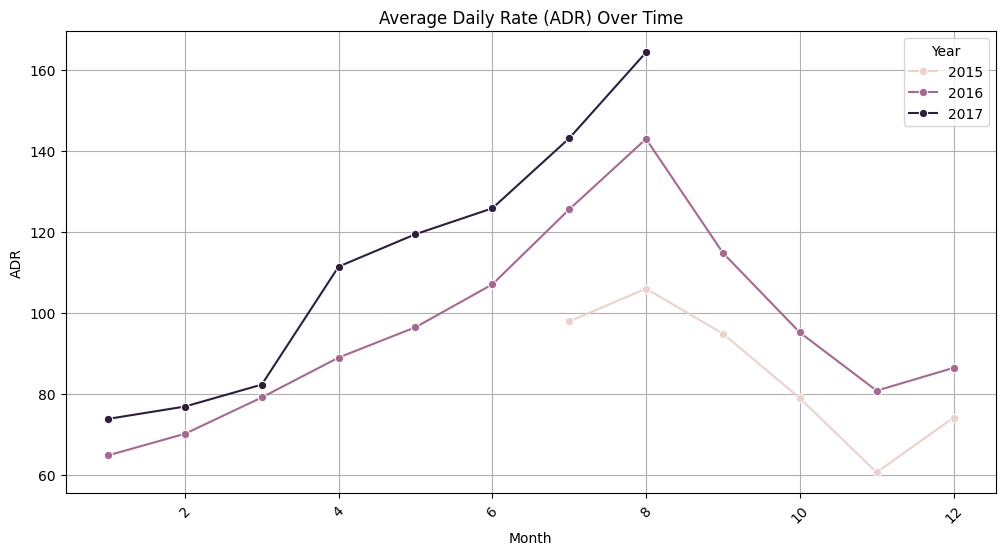

Cancellation Rate: 37.04%


<ipython-input-6-f12c57bbdfd7>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_bookings.index, y=country_bookings.values, palette='viridis')


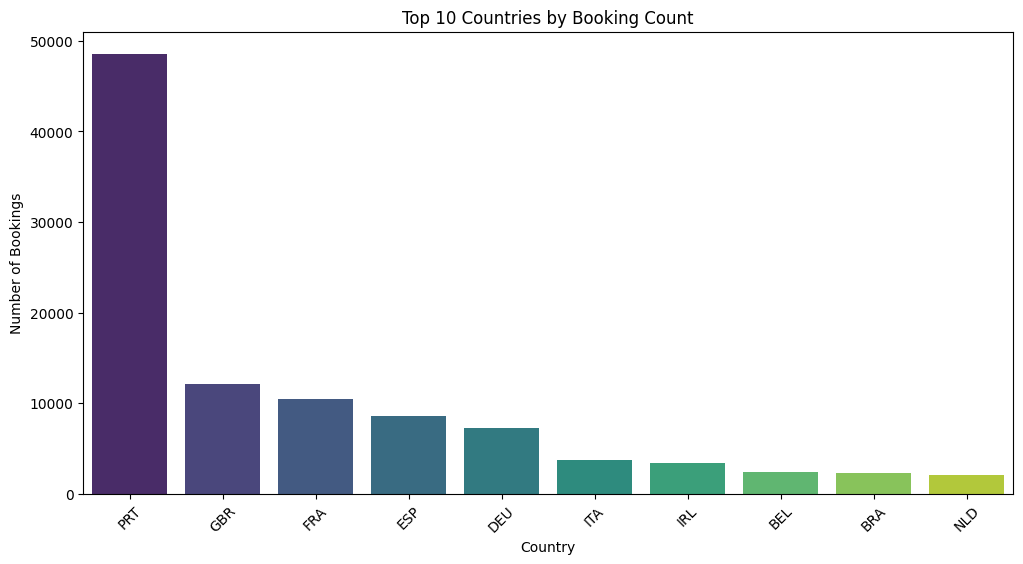

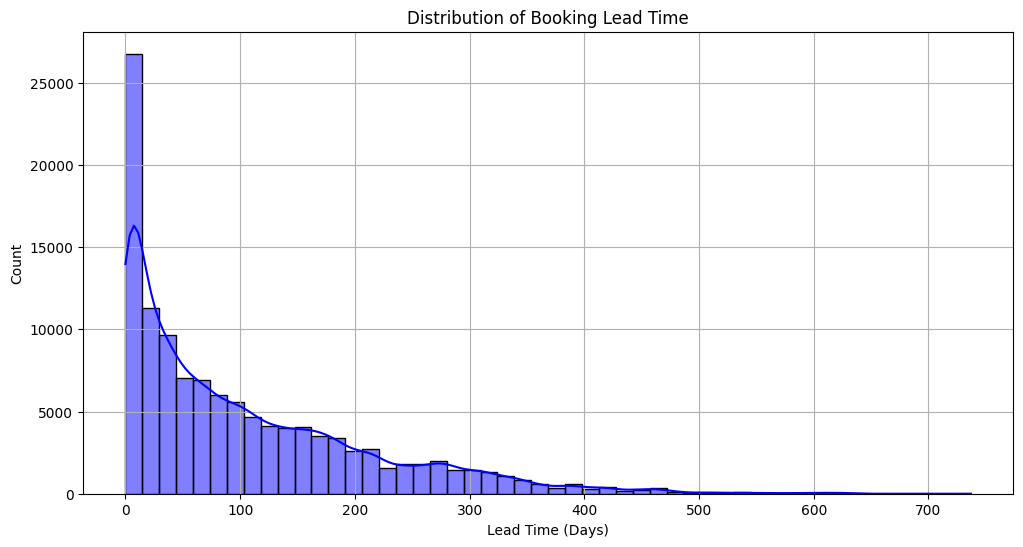

<ipython-input-6-f12c57bbdfd7>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_by_segment.index, y=cancellation_by_segment.values, palette='magma')


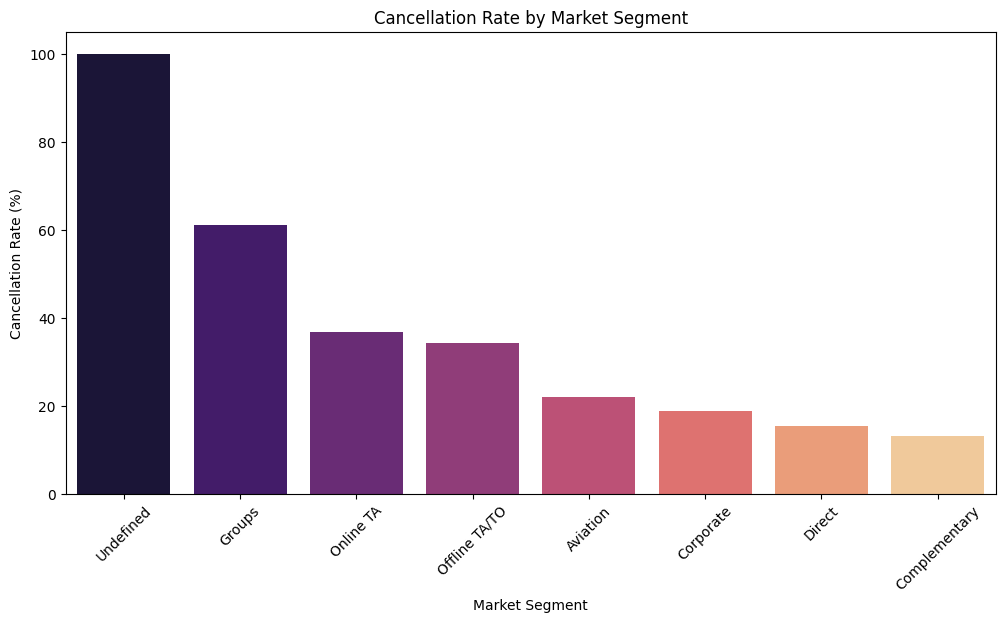

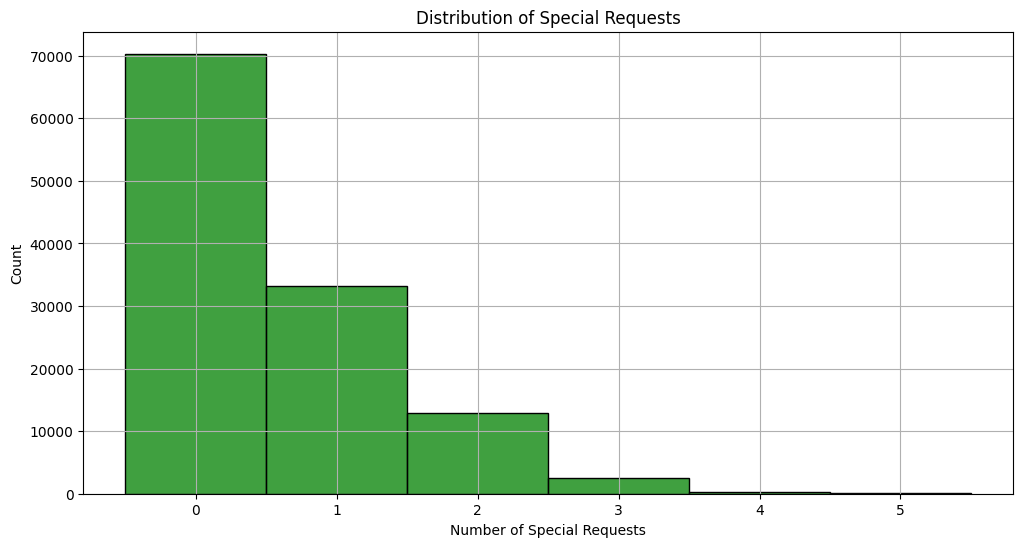

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ BUYOGO NTERNSHIP PRJ/cleaned_hotel_bookings.csv', parse_dates=['reservation_status_date'])


revenue_trends = df.groupby(['arrival_date_year', 'arrival_date_month'])['adr'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_date_month', y='adr', hue='arrival_date_year', data=revenue_trends, marker='o')
plt.title('Average Daily Rate (ADR) Over Time')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid()
plt.show()


cancellation_rate = df['is_canceled'].mean() * 100
print(f'Cancellation Rate: {cancellation_rate:.2f}%')


country_bookings = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=country_bookings.index, y=country_bookings.values, palette='viridis')
plt.title('Top 10 Countries by Booking Count')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Booking Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Count')
plt.grid()
plt.show()


cancellation_by_segment = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=cancellation_by_segment.index, y=cancellation_by_segment.values, palette='magma')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(df['total_of_special_requests'], bins=5, discrete=True, kde=False, color='green')
plt.title('Distribution of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.grid()
plt.show()

In [4]:
import pandas as pd
import numpy as np
import faiss
import json
from sentence_transformers import SentenceTransformer

csv_path = "/content/drive/MyDrive/Colab Notebooks/ BUYOGO NTERNSHIP PRJ/cleaned_hotel_bookings.csv"
df = pd.read_csv(csv_path)

columns_to_use = [
    "hotel", "is_canceled", "lead_time", "arrival_date_year", "arrival_date_month",
    "stays_in_week_nights", "adults", "children", "babies", "meal",
    "country", "market_segment", "distribution_channel", "customer_type",
    "adr", "total_of_special_requests", "reservation_status"
]

df["text_representation"] = df[columns_to_use].astype(str).agg(" | ".join, axis=1)
df[["text_representation"]].to_csv("booking_text_data.csv", index=False)

model = SentenceTransformer("all-MiniLM-L6-v2")
text_data = df["text_representation"].tolist()
embeddings = model.encode(text_data, convert_to_numpy=True)
np.save("booking_embeddings.npy", embeddings)

dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings)
faiss.write_index(index, "faiss_booking_index.idx")

metadata = {str(i): text_data[i] for i in range(len(text_data))}
with open("booking_metadata.json", "w") as f:
    json.dump(metadata, f)

def search_booking(query_text, top_k=5):
    query_embedding = model.encode([query_text], convert_to_numpy=True)
    index = faiss.read_index("faiss_booking_index.idx")
    distances, indices = index.search(query_embedding, top_k)

    with open("booking_metadata.json", "r") as f:
        metadata = json.load(f)

    results = [(metadata[str(idx)], distances[0][i]) for i, idx in enumerate(indices[0])]
    return results

if __name__ == "__main__":
    query = "Resort Hotel with 2 adults in July"
    query_results = search_booking(query, top_k=5)

    for text, score in query_results:
        print(f"- {text} | Score: {score}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

- Resort Hotel | 0 | 119 | 2017 | 6 | 4 | 2 | 2.0 | 0 | BB | IRL | Direct | Direct | Transient-Party | 175.0 | 1 | Check-Out | Score: 0.7128664255142212
- Resort Hotel | 0 | 119 | 2017 | 6 | 4 | 2 | 2.0 | 0 | BB | IRL | Direct | Direct | Transient-Party | 175.0 | 1 | Check-Out | Score: 0.7128664255142212
- Resort Hotel | 1 | 186 | 2017 | 4 | 2 | 2 | 0.0 | 0 | BB | PRT | Direct | Direct | Transient-Party | 76.67 | 1 | Canceled | Score: 0.717570424079895
- Resort Hotel | 1 | 186 | 2017 | 4 | 2 | 2 | 0.0 | 0 | BB | PRT | Direct | Direct | Transient-Party | 76.67 | 3 | Canceled | Score: 0.7232593297958374
- Resort Hotel | 0 | 143 | 2017 | 7 | 2 | 2 | 0.0 | 0 | BB | LUX | Direct | Direct | Transient-Party | 193.5 | 1 | Check-Out | Score: 0.7269982099533081


In [5]:
from google.colab import drive
drive.mount('/content/drive')

api_code = """
from fastapi import FastAPI
import faiss
import numpy as np
import json
from sentence_transformers import SentenceTransformer
import pandas as pd

app = FastAPI()

# Load Model and FAISS Index
model = SentenceTransformer("all-MiniLM-L6-v2")
index = faiss.read_index("faiss_booking_index.idx")

with open("booking_metadata.json", "r") as f:
    metadata = json.load(f)

@app.post("/ask")
def ask_question(query: str, top_k: int = 5):
    query_embedding = model.encode([query], convert_to_numpy=True)
    distances, indices = index.search(query_embedding, top_k)

    results = [{"text": metadata[str(idx)], "score": float(distances[0][i])} for i, idx in enumerate(indices[0])]
    return {"results": results}

@app.post("/analytics")
def get_analytics():
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ BUYOGO NTERNSHIP PRJ/cleaned_hotel_bookings.csv")
    analytics = {
        "total_revenue": df["adr"].sum(),
        "cancellation_rate": (df["is_canceled"].sum() / len(df)) * 100,
        "avg_lead_time": df["lead_time"].mean(),
    }
    return analytics

@app.get("/health")
def health_check():
    return {"status": "running"}
"""
with open("/content/drive/MyDrive/Colab Notebooks/ BUYOGO NTERNSHIP PRJ/app.py", "w") as f:
    f.write(api_code)

print("app.py created successfully in Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
app.py created successfully in Drive!


In [46]:
code = """from fastapi import FastAPI
import faiss
import numpy as np
import json
from sentence_transformers import SentenceTransformer
import pandas as pd
from fastapi.responses import JSONResponse

app = FastAPI()

# Load Model and FAISS Index
model = SentenceTransformer("all-MiniLM-L6-v2")
index = faiss.read_index("faiss_booking_index.idx")

with open("booking_metadata.json", "r") as f:
    metadata = json.load(f)

def format_result(raw_text, score):
    fields = [
        "hotel_type", "unknown_1", "customer_id", "year", "month", "day",
        "nights", "unknown_2", "unknown_3", "meal_plan", "hotel_category",
        "booking_channel", "booking_type", "customer_segment",
        "price", "unknown_4", "status"
    ]
    values = raw_text.split(" | ")
    formatted = dict(zip(fields, values))
    formatted["score"] = round(score, 4)
    formatted["customer_id"] = int(formatted["customer_id"])
    formatted["date"] = f"{formatted['year']}-{formatted['month'].zfill(2)}-{formatted['day'].zfill(2)}"
    formatted["nights"] = int(formatted["nights"])
    formatted["price"] = float(formatted["price"])
    formatted.pop("unknown_1", None)
    formatted.pop("unknown_2", None)
    formatted.pop("unknown_3", None)
    formatted.pop("unknown_4", None)
    formatted.pop("year", None)
    formatted.pop("month", None)
    formatted.pop("day", None)
    formatted.pop("booking_type", None)
    return formatted

from fastapi.responses import JSONResponse

@app.post("/ask")
def ask_question(query: str, top_k: int = 5):
    query_embedding = model.encode([query], convert_to_numpy=True)
    distances, indices = index.search(query_embedding, top_k)

    results = [
        format_result(metadata[str(idx)], float(distances[0][i]))
        for i, idx in enumerate(indices[0])
    ]

    return JSONResponse(content={"results": results}, media_type="application/json", headers={"Content-Type": "application/json"})


@app.post("/analytics")
def get_analytics():
    df = pd.read_csv("/mnt/data/cleaned_hotel_bookings.csv")
    analytics = {
        "total_revenue": df["adr"].sum(),
        "cancellation_rate": (df["is_canceled"].sum() / len(df)) * 100,
        "avg_lead_time": df["lead_time"].mean(),
    }
    return analytics

@app.get("/health")
def health_check():
    return {"status": "running"}
"""

# Write to /content/app.py
with open("/content/app.py", "w") as f:
    f.write(code)

print("app.py has been updated.")


app.py has been updated.


In [8]:
import shutil

src_path = "/content/drive/MyDrive/Colab Notebooks/ BUYOGO NTERNSHIP PRJ/app.py"
dst_path = "/content/app.py"

shutil.copy(src_path, dst_path)


'/content/app.py'

In [47]:
!ngrok authtoken 2uj6XPS0gUXJQDV0FRMxE8JaLGr_JjWruVeVYd6rJcXjvtcc


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [48]:
!nohup uvicorn app:app --host 0.0.0.0 --port 8000 --reload > logs.txt 2>&1 &


In [49]:
!curl http://127.0.0.1:8000/docs



    <!DOCTYPE html>
    <html>
    <head>
    <link type="text/css" rel="stylesheet" href="https://cdn.jsdelivr.net/npm/swagger-ui-dist@5/swagger-ui.css">
    <link rel="shortcut icon" href="https://fastapi.tiangolo.com/img/favicon.png">
    <title>FastAPI - Swagger UI</title>
    </head>
    <body>
    <div id="swagger-ui">
    </div>
    <script src="https://cdn.jsdelivr.net/npm/swagger-ui-dist@5/swagger-ui-bundle.js"></script>
    <!-- `SwaggerUIBundle` is now available on the page -->
    <script>
    const ui = SwaggerUIBundle({
        url: '/openapi.json',
    "dom_id": "#swagger-ui",
"layout": "BaseLayout",
"deepLinking": true,
"showExtensions": true,
"showCommonExtensions": true,
oauth2RedirectUrl: window.location.origin + '/docs/oauth2-redirect',
    presets: [
        SwaggerUIBundle.presets.apis,
        SwaggerUIBundle.SwaggerUIStandalonePreset
        ],
    })
    </script>
    </body>
    </html>
    

In [51]:
from pyngrok import ngrok

ngrok.kill()


public_url = ngrok.connect(8000)
print("Public API URL:", public_url)


Public API URL: NgrokTunnel: "https://8cfe-34-125-141-28.ngrok-free.app" -> "http://localhost:8000"


In [53]:
import requests
import json

BASE_URL =  "https://8cfe-34-125-141-28.ngrok-free.app"

query = "What is the best hotel with a sea view?"

response = requests.post(f"{BASE_URL}/ask", params={"query": query, "top_k": 5})

try:
    print("Response:", json.dumps(response.json(), indent=4))
except Exception as e:
    print("Error:", response.text)


Response: {
    "results": [
        {
            "hotel_type": "Resort Hotel",
            "customer_id": 152,
            "nights": 2,
            "meal_plan": "FB",
            "hotel_category": "LUX",
            "booking_channel": "Direct",
            "customer_segment": "Transient",
            "price": 296.5,
            "status": "Check-Out",
            "score": 0.8918,
            "date": "2017-07-03"
        },
        {
            "hotel_type": "Resort Hotel",
            "customer_id": 191,
            "nights": 2,
            "meal_plan": "BB",
            "hotel_category": "LUX",
            "booking_channel": "Direct",
            "customer_segment": "Transient",
            "price": 146.94,
            "status": "Check-Out",
            "score": 0.8927,
            "date": "2016-07-06"
        },
        {
            "hotel_type": "Resort Hotel",
            "customer_id": 143,
            "nights": 2,
            "meal_plan": "BB",
            "hotel_category": "L

In [55]:
import requests
import json

BASE_URL =  "https://8cfe-34-125-141-28.ngrok-free.app"

query = "Which hotel has the best customer reviews?"

response = requests.post(f"{BASE_URL}/ask", params={"query": query, "top_k": 5})

try:
    print("Response:", json.dumps(response.json(), indent=4))
except Exception as e:
    print("Error:", response.text)


Response: {
    "results": [
        {
            "hotel_type": "Resort Hotel",
            "customer_id": 262,
            "nights": 1,
            "meal_plan": "HB",
            "hotel_category": "BEL",
            "booking_channel": "Groups",
            "customer_segment": "Transient-Party",
            "price": 65.5,
            "status": "Check-Out",
            "score": 0.9827,
            "date": "2015-09-03"
        },
        {
            "hotel_type": "Resort Hotel",
            "customer_id": 46,
            "nights": 2,
            "meal_plan": "HB",
            "hotel_category": "IRL",
            "booking_channel": "Direct",
            "customer_segment": "Transient",
            "price": 163.71,
            "status": "Check-Out",
            "score": 0.993,
            "date": "2017-05-05"
        },
        {
            "hotel_type": "Resort Hotel",
            "customer_id": 262,
            "nights": 2,
            "meal_plan": "HB",
            "hotel_category":